# Convex hull demonstration
## Import necessary python packages

In [1]:
from ipywidgets import interact

import scipy as sp
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
%matplotlib inline

plt.style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D

## Define plotting function

In [2]:
#generate a fixed number of random points
all_Cs = sp.rand(150,3)
X = sp.rand(150,3)

def plot_convhull(npts = 3):
    #select first N pts
    Cs = all_Cs[0:npts,[0,1]]

    xs,ys = Cs[:,0], Cs[:,1]

    #compute convex hull from scipy.spatial
    hull = ConvexHull(Cs)
    xs, ys = Cs[hull.vertices,0], Cs[hull.vertices,1]

    #plot
    fig = plt.figure(figsize=(12,6))
    
    #plot without convex hull
    plt.subplot(1,2,1)
    plt.plot(Cs[:,0],Cs[:,1], 'ko')
    
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    plt.xlabel('Component 1 (mol/L)')
    plt.ylabel('Component 2 (mol/L)')
    plt.title('All %i points'%npts)
    
    #plot with convex hull
    plt.subplot(1,2,2)
    plt.hold(True)
    
    plt.fill(xs,ys, 'g', alpha=0.5)
    plt.plot(Cs[:,0],Cs[:,1], 'ko')
    plt.plot(xs,ys, 'wo')

    plt.axis([-0.1, 1.1, -0.1, 1.1])
    plt.xlabel('Component 1 (mol/L)')
    plt.ylabel('Component 2 (mol/L)')
    plt.title('Convex hull (%i unique)'%len(xs))

    plt.show()
    
def plot_3d_convhull(num_pts = 3, elevation=15, rotation=30):
    Cs = all_Cs[0:num_pts, :]
    
    hull = ConvexHull(Cs)
    K = hull.vertices
    simplices = hull.simplices
    xs,ys,zs = Cs[K,0], Cs[K,1], Cs[K,2]
    
    fig = plt.figure(figsize=(10,10))
    plt.hold(True)
    ax = fig.gca(projection="3d")
    
    ax.plot(Cs[:,0],Cs[:,1],Cs[:,2], "ko")
    ax.plot(xs,ys,zs, "wo")
    ax.plot_trisurf(Triangulation(Cs[:,0],Cs[:,1],simplices), Cs[:,2], color="g", alpha=0.25)
    
    ax.set_title("%i total points (%i unique)"%(num_pts, len(K)))
    
    ax.set_xlim3d(-0.1,1.1)
    ax.set_ylim3d(-0.1,1.1)
    ax.set_zlim3d(-0.1,1.1)
    
    ax.view_init(elevation,rotation)
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()

## Interact:
Plot N random points and and compare with its convex hull.
Use the slider to change the number of points.

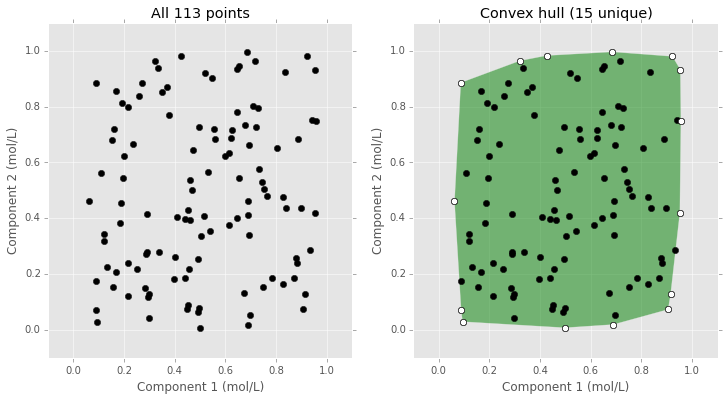

In [3]:
interact(plot_convhull, npts=(3,150,1))

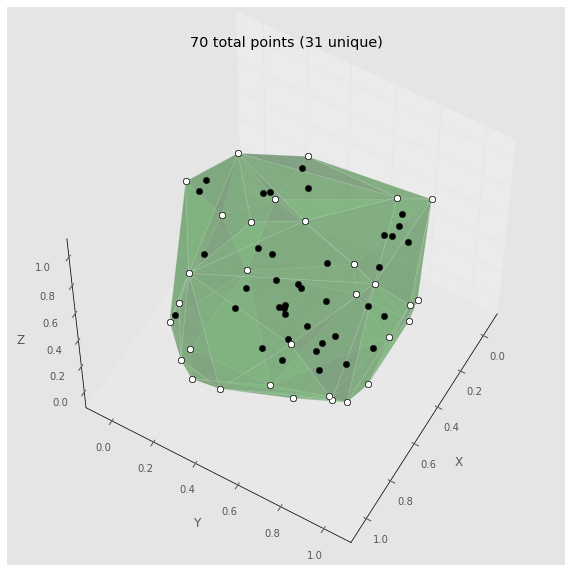

In [4]:
interact(plot_3d_convhull, num_pts=(4,100,1), elevation=(0,180,1), rotation=(0,360,1))